# Assignment1 Part-B

This code does image classification for 7 fruit categories = ['apple', 'cabbage', 'carrot', 'cucumber', 'eggplant', 'pear', 'zucchini']

The dataset was imbalanced. This notebook illustrate steps like Data exploration, model building, Image Data Generator, Learning Curves, Model evaluation, etc

In [1]:
#importing necessary libraries
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [2]:
#Setting Training dir paths
train_path = './Dataset/Dataset/Train/'

In [3]:
#Setting Test dir paths        
test_path = './Dataset/Dataset/Test/'

# Exploratory Data Analysis

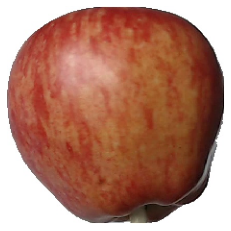

In [4]:
#Displaying the image
img = load_img(train_path + "Apple/r0_0.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

(227, 227, 3)


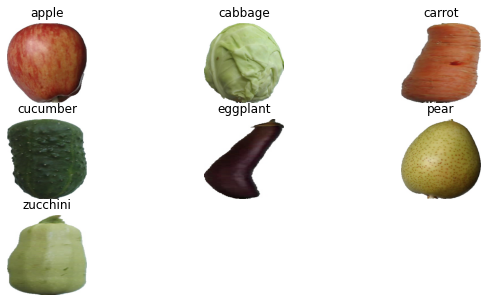

In [6]:
#Visualizing more Images from each class
images = ['apple', 'cabbage', 'carrot', 'cucumber', 'eggplant', 'pear', 'zucchini']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/r0_0.jpg", target_size=(227,227)))

In [7]:
#Getting the count of images for each class
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ",len(class_names))

class             Count:
------------------------
apple                309
cabbage              96
carrot               101
cucumber             100
eggplant             160
pear                 326
zucchini             160
------------------------
Number of classes :  7


Here we can see that data is imabalanced. Apple and pear has maximum number of images. 

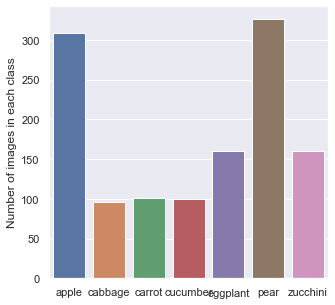

In [8]:
#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

In [9]:
#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

7


# Model using Alexnet architecture

This model consist of 5 convolution layers followed by 3 fully connected layers. Ativation function used is relu. The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively.

I tried several combinations of layers and looked at the results. Finally, Alexnet model gave accuracy of 80.7

In [34]:
#Using Alexnet architecture. input is 227, 227,3 image and output is 7 classes of fruits 
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(7, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])

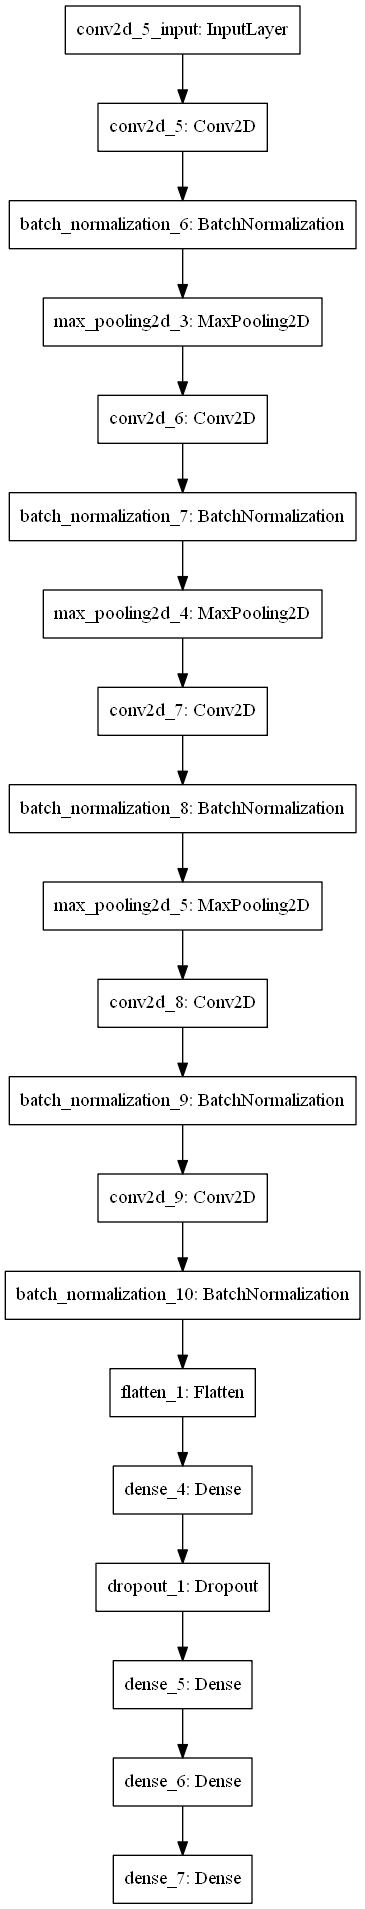

In [35]:
# plot graph
plot_model(model, to_file='fruit_classification.png')

# Compiling the model


In [36]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [37]:
#Getting model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_7 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [38]:
#Specifing epochs & batch size
epochs = 100
batch_size = 32
image_height = 227
image_width = 227

# Image Augmentation

Using Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

In [39]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)

In [40]:
#Generating batches of Augmented data of image size 227, 227 and batch size of 32
train_generator = train_datagen.flow_from_directory(
directory = train_path, 
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())

Found 1252 images belonging to 7 classes.
Found 623 images belonging to 7 classes.


# Creating callback list

Creating three callbacks to monitor Learning Rate by a factor of 0.1, to save best validation accuracy model and for early stopping with patience = 10

In [41]:
from keras.callbacks import ReduceLROnPlateau
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='fruit_model.h5',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]

# Model Fit

In [42]:
#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)

Epoch 1/100
39/39 [==============================] - 13s 317ms/step - loss: 2.3546 - accuracy: 0.7123 - val_loss: 559.1302 - val_accuracy: 0.1266

Epoch 00001: val_accuracy improved from -inf to 0.12664, saving model to fruit_model.h5
Epoch 2/100
39/39 [==============================] - 12s 313ms/step - loss: 0.5786 - accuracy: 0.8336 - val_loss: 69.1358 - val_accuracy: 0.2911

Epoch 00002: val_accuracy improved from 0.12664 to 0.29112, saving model to fruit_model.h5
Epoch 3/100
39/39 [==============================] - 12s 305ms/step - loss: 0.3528 - accuracy: 0.8721 - val_loss: 24.6269 - val_accuracy: 0.3931

Epoch 00003: val_accuracy improved from 0.29112 to 0.39309, saving model to fruit_model.h5
Epoch 4/100
39/39 [==============================] - 12s 306ms/step - loss: 0.2094 - accuracy: 0.9082 - val_loss: 6.9209 - val_accuracy: 0.7138

Epoch 00004: val_accuracy improved from 0.39309 to 0.71382, saving model to fruit_model.h5
Epoch 5/100
39/39 [==============================] - 12

# Accuracy and loss Learning curves

Accuracy learning curve shows that towards epoch 24, model training and validation accuracy are same.

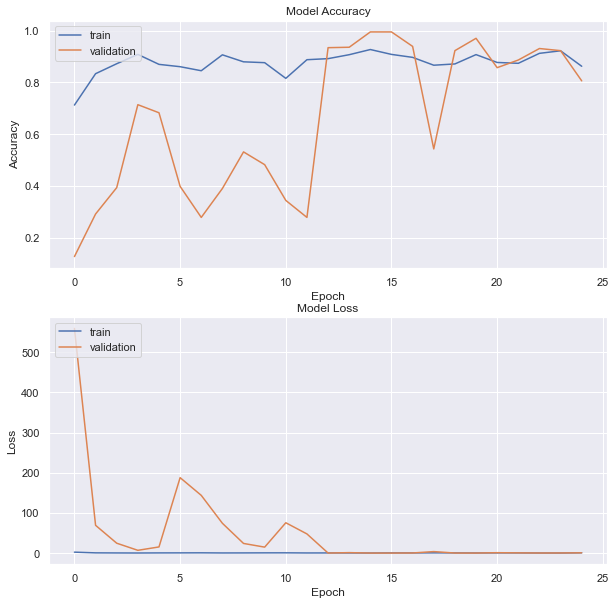

In [43]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

# Evaluating model

In [44]:
# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])

20/20 [==============================] - 2s 83ms/step - loss: 0.6784 - accuracy: 0.8074
test loss: 0.6784226894378662
test accuracy: 0.80738365650177


# Model Saving and Prediction

In [45]:
# save the whole model
model.save("./fruit_model.h5")

In [46]:
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

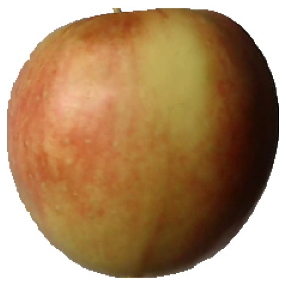

In [51]:
sample_path='./Dataset/Dataset/new_samples/'
img = load_img(sample_path + "r0_6.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [52]:
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(227, 227, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 227, 227, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [53]:
img = load_image(sample_path + "r0_6.jpg")
model = load_model('fruit_model.h5')

In [54]:
# predict the class
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Apple")
elif result[0] == 1:
    print("cabbage")
elif result[0] == 2:
    print("carrot")
elif result[0] == 3:
    print("cucumber")
elif result[0] == 4:
    print("eggplant")
elif result[0] == 5:
    print("pear")
elif result[0] == 6:
    print("zucchini")
else:
    print("Not in the list")

Apple


Objective - To classify given image of fruit into correct cotegory. This problem is a case of multi-class classification. In this problem, we were given images of 7 different fruits with an imbalance data. 

Conclusion/Recommendation - I tried several models which didn't gave correct classification. Finally, Alexnet architecture gave the correct model. This model consist of 5 convolution layers followed by 3 fully connected layers. Ativation function used is relu. The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively. The size of input image was 227,227,3. I used learning rate of 0.001 and Adam optimizer. I also used Image Data generator to expand training dataset, improve model performance and it's ability of generalization. This classification model gives test accuracy of 80.73% and when tried on few sample images, it classifies them correctly.